In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kmeans-cluster-data/my_data_without_y.csv


## Load the Dataset

In [2]:
X = pd.read_csv('/kaggle/input/kmeans-cluster-data/my_data_without_y.csv')
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(21)])

In [3]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,4,3,3,5,1,4,1,5,4,3,...,5,5,2,3,2,3,3,3,5,3
1,3,4,3,5,1,2,4,5,3,5,...,3,4,1,1,2,1,3,3,5,3
2,2,5,1,2,5,5,2,1,2,3,...,3,3,1,5,4,3,5,5,2,2
3,1,2,4,1,5,4,2,3,5,4,...,3,4,3,4,1,2,5,3,1,1
4,2,2,3,2,3,5,2,2,1,4,...,2,1,3,5,4,2,5,1,2,3


In [4]:
print(df.shape)

(100, 21)


## Standardization

In [5]:
# features_to_scale = [f"feature_{i}" for i in range(21)]  # Original numerical features
numerical_cols = df.columns[:21] 
# scaler = StandardScaler()

# scaled_data = scaler.fit_transform(df[features_to_scale])
# scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

## Replacing Scaled data with Original Data

In [6]:
# df = pd.concat([scaled_df, df.drop(features_to_scale, axis=1)], axis=1)
df = df.drop(numerical_cols, axis=1)
df = pd.concat([scaled_df, df], axis=1) 

## Apply PCA

In [7]:
# 3. Apply PCA 
n_components = 2  
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data) #Fit PCA on the whole dataframe
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

## Feature Importance Visualization

<Figure size 1200x600 with 0 Axes>

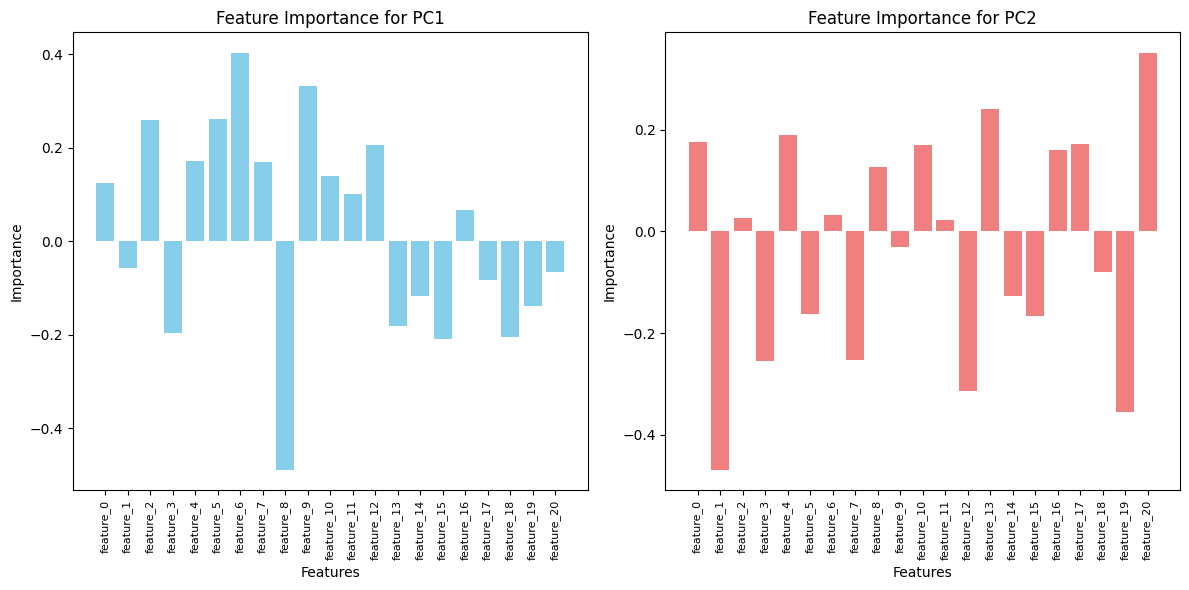

In [8]:

feature_importance = pd.DataFrame(pca.components_, columns=numerical_cols, index=['PC-1', 'PC-2'])

plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

plt.figure(figsize=(12, 6))

# Plotting feature importance for PC1
plt.subplot(1, 2, 1)
plt.bar(range(len(numerical_cols)), pca.components_[0], color='skyblue')
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=90, fontsize=8) #Use numerical_cols here
plt.xlabel('Features', fontsize=10)
plt.ylabel('Importance', fontsize=10)
plt.title('Feature Importance for PC1', fontsize=12)

# Plotting feature importance for PC2
plt.subplot(1, 2, 2)
plt.bar(range(len(numerical_cols)), pca.components_[1], color='lightcoral')
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=90, fontsize=8) #Use numerical_cols here
plt.xlabel('Features', fontsize=10)
plt.ylabel('Importance', fontsize=10)
plt.title('Feature Importance for PC2', fontsize=12)

plt.tight_layout()
plt.show()

## Plotting

In [9]:
from sklearn.metrics import calinski_harabasz_score
inertia = []
silhouette_scores = []
ch_indices = []  # Calinski-Harabasz indices

for k in range(2, 11):  # Test a range of k values
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init = 'k-means++')
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(pca_data, labels))
    #Importing the function to calculate CH Index
    ch_indices.append(calinski_harabasz_score(pca_data, labels))

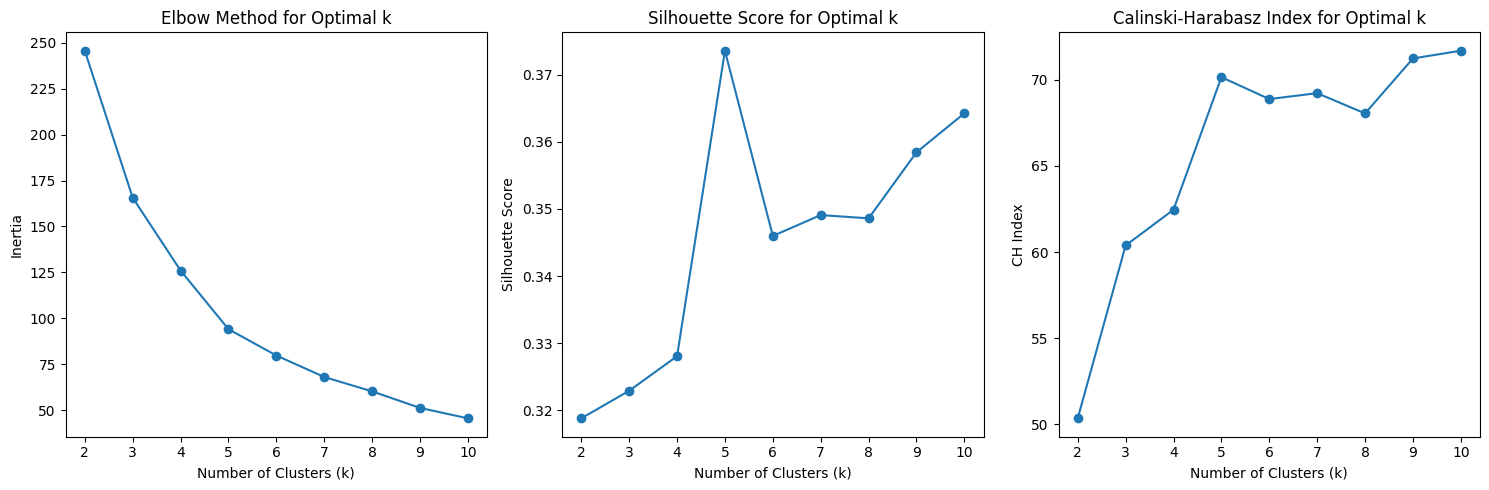

In [10]:
# Elbow Method Chart
plt.figure(figsize=(15, 5))  # Adjusted figure size for 3 plots

plt.subplot(1, 3, 1)  # 1 row, 3 columns, first plot
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Silhouette Score Chart
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second plot
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Index Chart
plt.subplot(1, 3, 3)  # 1 row, 3 columns, third plot
plt.plot(range(2, 11), ch_indices, marker='o')
plt.title('Calinski-Harabasz Index for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Index')

plt.tight_layout()
plt.show()

## Apply K-means with the chosen k 

In [11]:
# Apply K-means with the chosen k 
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, init = 'k-means++')
kmeans.fit(pca_data)
labels = kmeans.labels_
pca_df['cluster'] = labels

In [12]:
labels

array([1, 1, 1, 0, 0, 0, 1, 2, 1, 4, 1, 4, 0, 0, 3, 0, 0, 1, 4, 0, 4, 0,
       2, 1, 1, 0, 1, 2, 3, 3, 0, 2, 2, 4, 0, 3, 4, 1, 0, 1, 2, 3, 1, 3,
       1, 4, 4, 2, 4, 2, 0, 0, 4, 4, 1, 1, 4, 4, 0, 4, 3, 0, 0, 4, 0, 0,
       0, 1, 3, 1, 4, 0, 0, 2, 3, 1, 3, 0, 3, 3, 2, 0, 4, 3, 1, 0, 1, 4,
       2, 3, 2, 0, 3, 1, 3, 3, 0, 0, 3, 0], dtype=int32)

## Clustering

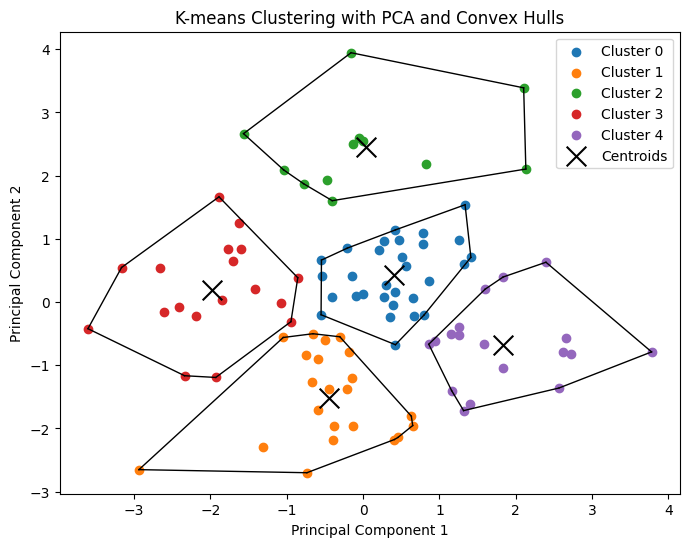

        PC1       PC2  cluster
0 -0.589228 -1.711813        1
1  0.632256 -1.805893        1
2 -0.584319 -0.906308        1
3  0.214482  0.819525        0
4  0.467220  0.974374        0


In [13]:
from scipy.spatial import ConvexHull

# 6. Visualize the clusters with circles (Convex Hulls)
plt.figure(figsize=(8, 6))

for i in range(optimal_k):
    cluster_data = pca_df[pca_df['cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {i}')

    # Calculate and plot the convex hull for each cluster
    if len(cluster_data) > 2:  # ConvexHull needs at least 3 points
        points = cluster_data[['PC1', 'PC2']].values
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k-', linewidth=1)  # Plot hull edges

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.title('K-means Clustering with PCA and Convex Hulls')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()  # Now the legend will be more informative
plt.show()

print(pca_df.head())

In [14]:
pca_df

,PC1,PC2,cluster
0,-0.589228,-1.711813,1
1,0.632256,-1.805893,1
2,-0.584319,-0.906308,1
3,0.214482,0.819525,0
4,0.467220,0.974374,0
...,...,...,...
95,-0.944664,-0.310670,3
96,0.424121,-0.675125,0
97,1.257020,0.989102,0
98,-2.601385,-0.158889,3


## Visualize the clusters in 2D

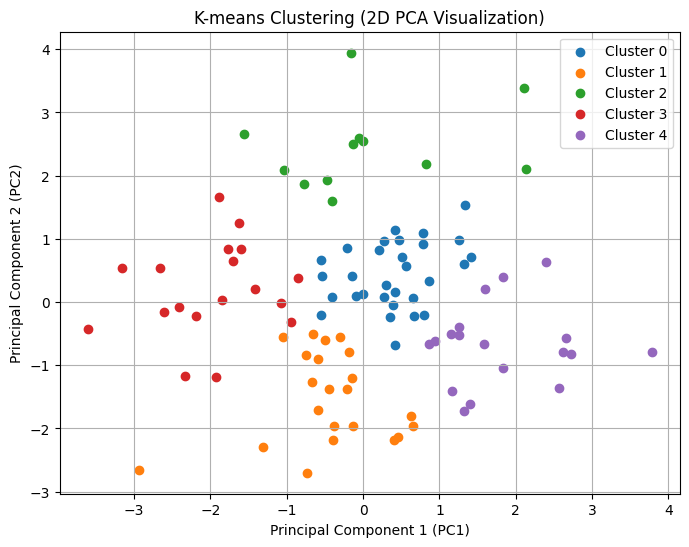

In [15]:

plt.figure(figsize=(8, 6))

# Iterate through each cluster and plot the points
for i in range(optimal_k):  # optimal_k is the number of clusters you determined
    cluster_data = pca_df[pca_df['cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {i}')

plt.title('K-means Clustering (2D PCA Visualization)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()  
plt.grid(True)
plt.show()



In [16]:
print(pca_df.head())
print(pca_df.shape) 

        PC1       PC2  cluster
0 -0.589228 -1.711813        1
1  0.632256 -1.805893        1
2 -0.584319 -0.906308        1
3  0.214482  0.819525        0
4  0.467220  0.974374        0
(100, 3)
